# Задание 7
Реализовать и использовать метод Ньютона для решения системы уравнений или для минимизации функции.

## Теория

### Метод Ньютона

Утверждается, что если $f\in C^2[a;b]$, $\exists p\in[a;b]:f(p)=0$ и $f'(p)\neq 0$, то последовательность
$$p_k=g(p_{k-1})=p_{k-1}-\frac{p_{k-1}}{f'(p_{k-1})}$$
будет сходится к $p$.

Функция $g(x)$:
$\begin{equation}g(x) = x-\frac{f(x)}{f'(x)}\end{equation}$
называется интерполяционной функцией Ньютона-Рафсона. (Док-во всего строится через Тейлора, если считать, что начальное приближение близко к корню.)

Минимизировать (максимизировать) функцию при помощи этого метода не сложно. Нужно взять производную от оригинальной функции $f'(x)$ и найти её корни $f'(x)=0$, которые будут экстремумами.

Говоря про системы уравнений, суть остается той же, добавляется только матрица Якоби, увеличивается размерность, плюс теперь нужно будет найти дифференциал. Уравнение (1) будет переписано в виде:
$$J(X_k)\Delta X=-F(X_k),$$
а следующая точка будет выводится из $\Delta X$ в виде:
$$X_{k+1}=X_k+\Delta X$$

## Код

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Оптимизация функции

Возьмем функцию:
$$f(x) = x^4 - 3x^2 + 1,$$
С начальным приближением $x_0 = 0.5$. Производная такой функции:
$$f'(x) = 4x^3 - 6x,$$
а вторая производная:
$$f''(x) = 12x^2 - 6.$$
Наша цель -- найти нули первой производной при помощи метода Ньютона

In [2]:
def f(x):
    return x**4-3*x**2+1

def f_prime(x):
    return 4*x**3-6*x

def f_pprime(x):
    return 12*x**2-6

x_array = np.zeros(10)
x_array[0] = 2

for i in range(9):
    x_array[i+1] = x_array[i] - f_prime(x_array[i])/f_pprime(x_array[i])

x_array

array([2.        , 1.52380952, 1.29465335, 1.23002775, 1.22477871,
       1.22474487, 1.22474487, 1.22474487, 1.22474487, 1.22474487])

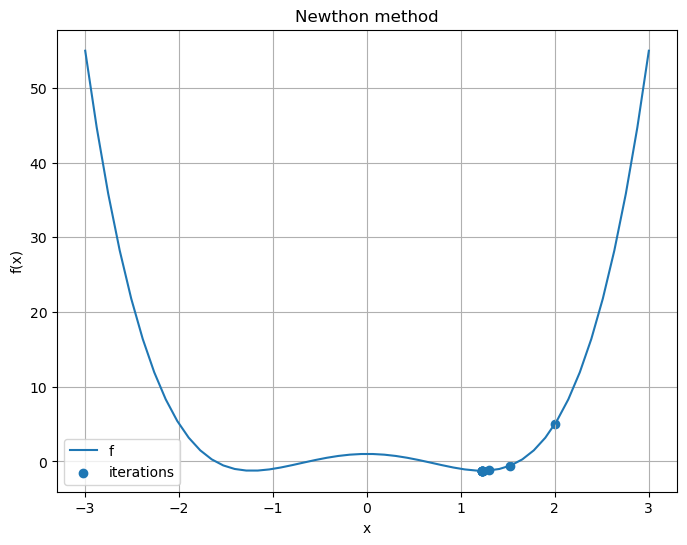

In [3]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.plot(np.linspace(-3,3), f(np.linspace(-3,3)), label="f")
ax.scatter(x_array, f(x_array), label="iterations")

ax.set_title("Newthon method")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.grid()
ax.legend()

plt.show()

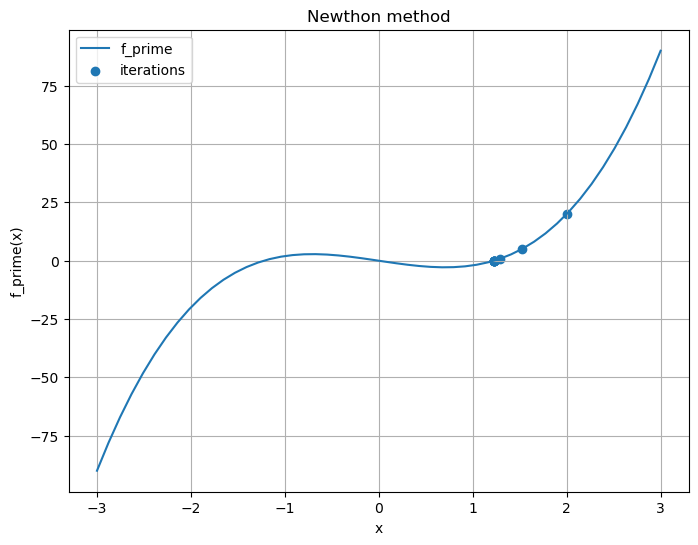

In [4]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.plot(np.linspace(-3,3), f_prime(np.linspace(-3,3)), label="f_prime")
ax.scatter(x_array, f_prime(x_array), label="iterations")

ax.set_title("Newthon method")
ax.set_xlabel("x")
ax.set_ylabel("f_prime(x)")
ax.grid()
ax.legend()

plt.show()

### Решение системы уравнений

Возьмем систему:
$$\begin{matrix}
0 = x^2-2x-y+0.5, \\
0 = x^2 + 4y^2-4.
\end{matrix}$$
Её вектор-функция и матрица Якоби имеют вид:
$$F(x,y) = \left[\begin{matrix}
x^2-2x-y+0.5 \\
x^2 + 4y^2-4
\end{matrix}\right],~
J(x,y) = \left[\begin{matrix}
2x-2 & -1 \\
2x & 8y
\end{matrix}\right].$$
Запрограммируем это в явном виде и проитерируем

In [5]:
def F(X):
    return np.array([X[0]**2-2*X[0]-X[1]+0.5, X[0]**2+4*X[1]**2-4])

def J(X):
    return np.array([[2*X[0]-2, -1],[2*X[0], 8*X[1]]])

In [6]:
X_array = np.zeros((6,2))
X_array[0] = np.array([4, 1])

for i in range(5):
    Delta_X = np.matmul(np.linalg.inv(J(X_array[i])), -F(X_array[i]))
    X_array[i+1] = X_array[i] + Delta_X

X_array

array([[4.        , 1.        ],
       [2.64285714, 0.35714286],
       [2.0460461 , 0.23802901],
       [1.9109294 , 0.31153586],
       [1.90072067, 0.31119351],
       [1.90067673, 0.31121857]])